In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ma,27_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
2025-04-02,337.559998,342.279999,317.519989,318.559998,545000,332.894168,332.658520,-1.0,0.031095,-0.031095
2025-04-03,313.899994,318.000000,302.010986,315.554993,946100,325.480737,325.937000,1.0,-0.041175,-0.099007
2025-04-04,292.880005,300.000000,275.000000,295.029999,1599300,315.189960,316.732698,-1.0,-0.105382,-0.038673
2025-04-07,296.510010,319.122009,274.970001,285.309998,1475500,310.114684,312.067652,-1.0,-0.094294,-0.050588
2025-04-08,293.269989,319.947998,288.765015,317.809998,922300,306.020537,308.327047,-1.0,-0.104191,-0.040213
...,...,...,...,...,...,...,...,...,...,...
2025-08-18,369.190002,371.630005,338.510010,338.510010,3135600,346.007401,359.797443,-1.0,0.127711,0.453936
2025-08-19,340.660004,368.394012,338.000000,367.010010,1905200,345.184725,358.429450,-1.0,0.040564,0.566292
2025-08-20,338.880005,340.750000,322.709991,338.279999,1336700,344.214768,357.032081,-1.0,0.035127,0.574476


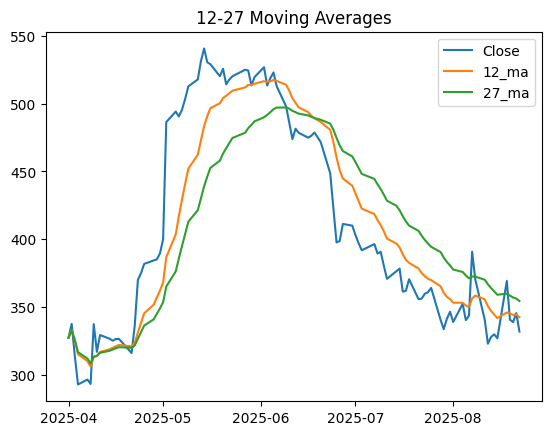

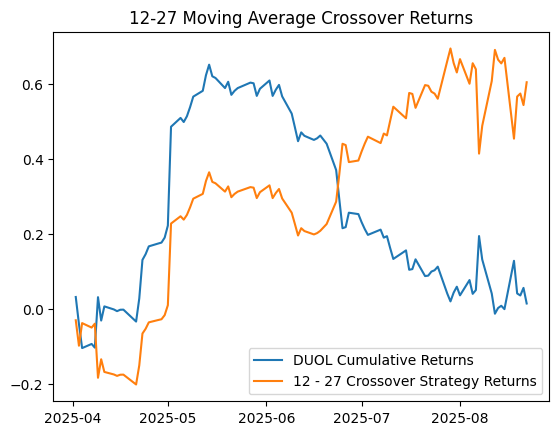

In [25]:
TICKER = 'DUOL'
FAST = 12
SLOW = 27
LOOKBACK = 100

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].ewm(span=fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].ewm(span=slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title(f'{FAST}-{SLOW} Moving Averages');
    return df.dropna()

def add_strategy(df, fast, slow):
    
    # long when fast > slow, short otherwise
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
    plt.title(f'{FAST}-{SLOW} Moving Average Crossover Returns'); 

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df, FAST, SLOW)
    df = add_strategy(df, FAST, SLOW)
    df = test_strategy(df, TICKER, FAST, SLOW)

    return df

main()